```
###############################
##                           ##
##  Deep Learning in Python  ##
##                           ##
###############################

§1 Introduction to Deep Learning in Python

§1.4 Fine-tuning keras models
```

# Understanding model optimization

**1. Why is optimization hard?**

* Simultaneously optimize 1000's of parameters with complex relationships.

* Updates may not improve the model meaningfully.

* Updates will be too small (if the learning rate is low) or too large (if the learning rate is high).

**2. Code of stochastic gradient descent:**

In [1]:
import pandas as pd
from keras.layers import Dense
from keras.models import Sequential
from keras.utils.np_utils import to_categorical
from keras.optimizers import SGD


def data_preparation(df):
    df = df.reindex(columns=[
        'SHOT_CLOCK', 'DRIBBLES', 'TOUCH_TIME', 'SHOT_DIST', 'CLOSE_DEF_DIST',
        'SHOT_RESULT'
    ])
    df['SHOT_CLOCK'] = df['SHOT_CLOCK'].fillna(0)
    df['SHOT_RESULT'].replace('missed', 0, inplace=True)
    df['SHOT_RESULT'].replace('made', 1, inplace=True)
    df.columns = df.columns.str.lower()
    return df


data = pd.read_csv('ref1. Basketball shot log.csv')
data = data_preparation(data)

predictors = data.drop(['shot_result'], axis=1).to_numpy()
n_cols = predictors.shape[1]
target = to_categorical(data.shot_result)
input_shape = (n_cols, )

In [2]:
def get_new_model(input_shape=input_shape):
    model = Sequential()
    model.add(Dense(100, activation='relu', input_shape=input_shape))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(2, activation='softmax'))
    return (model)


lr_to_test = [.000001, 0.01, 1]

# loop over learning rates
for lr in lr_to_test:
    model = get_new_model()
    my_optimizer = SGD(lr=lr)
    model.compile(optimizer=my_optimizer, loss='categorical_crossentropy')
    model.fit(predictors, target)

4003/4003 [==============================] - 13s 3ms/step - loss: nan


**3. What is the dying neuron problem?**

![The dying neuron problem](ref2.%20The%20dying%20neuron%20problem.jpg)

**4. What is the vanishing gradient problem?**

* This occurs when many layers have very small slopes:

    * e.g., *due to being on at part of the hyperbolic tangent (`tanh`) curve*

* In deep networks, updates to backpropagation were close to 0.

![Vanishing gradients](ref3.%20Vanishing%20gradient.jpg)

**5. Practice question for diagnosing optimization problems:**

* Which of the following could prevent a model from showing an improved loss in its first few epochs?

    $\Box$ Learning rate too low.

    $\Box$ Learning rate too high.

    $\Box$ Poor choice of the activation function.

    $\boxtimes$ All of the above.

**6. Practice exercises for understanding model optimization:**

$\blacktriangleright$ **Package pre-loading:**

In [3]:
import pandas as pd
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical

$\blacktriangleright$ **Data pre-loading:**

In [4]:
df = pd.read_csv('ref4. Titanic.csv')

df.replace(False, 0, inplace=True)
df.replace(True, 1, inplace=True)

predictors = df.drop(['survived'], axis=1).to_numpy()
n_cols = predictors.shape[1]
target = to_categorical(df.survived)
input_shape = (n_cols, )

$\blacktriangleright$ **Code pre-loading:**

In [5]:
def get_new_model(input_shape=input_shape):
    model = Sequential()
    model.add(Dense(100, activation='relu', input_shape=input_shape))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(2, activation='softmax'))
    return (model)

$\blacktriangleright$ **Changing optimization parameters practice:**

In [6]:
# Import the SGD optimizer
from keras.optimizers import SGD

# Create list of learning rates: lr_to_test
lr_to_test = [.000001, 0.01, 1]

# Loop over learning rates
for lr in lr_to_test:
    print('\n\nTesting model with learning rate: %f\n' % lr)

    # Build new model to test, unaffected by previous models
    model = get_new_model()

    # Create SGD optimizer with specified learning rate: my_optimizer
    my_optimizer = SGD(lr=lr)

    # Compile the model
    model.compile(optimizer=my_optimizer, loss='categorical_crossentropy')

    # Fit the model
    model.fit(predictors, target)



Testing model with learning rate: 0.000001

28/28 [==============================] - 1s 42ms/step - loss: 1.9507


Testing model with learning rate: 0.010000

28/28 [==============================] - 1s 46ms/step - loss: 2.3604


Testing model with learning rate: 1.000000

28/28 [==============================] - 1s 43ms/step - loss: 6803292892.7938


# Model validation

**1. Why is it important to choose validation in deep learning?**

* Repeated training from cross-validation would take a long time, so it is common to use validation split rather than cross-validation. 

* Deep learning is widely used in large datasets because the single validation score is based on a large amount of data and is reliable.

**2. Code of model validation:**

In [7]:
import pandas as pd
from keras.layers import Dense
from keras.models import Sequential
from keras.utils.np_utils import to_categorical


def data_preparation(df):
    df = df.reindex(columns=[
        'SHOT_CLOCK', 'DRIBBLES', 'TOUCH_TIME', 'SHOT_DIST', 'CLOSE_DEF_DIST',
        'SHOT_RESULT'
    ])
    df['SHOT_CLOCK'] = df['SHOT_CLOCK'].fillna(0)
    df['SHOT_RESULT'].replace('missed', 0, inplace=True)
    df['SHOT_RESULT'].replace('made', 1, inplace=True)
    df.columns = df.columns.str.lower()
    return df


data = pd.read_csv('ref1. Basketball shot log.csv')
data = data_preparation(data)

predictors = data.drop(['shot_result'], axis=1).to_numpy()
n_cols = predictors.shape[1]
target = to_categorical(data.shot_result)
input_shape = (n_cols, )


def get_new_model(input_shape=input_shape):
    model = Sequential()
    model.add(Dense(100, activation='relu', input_shape=input_shape))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(2, activation='softmax'))
    return (model)


model = get_new_model()

In [8]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(predictors, target, validation_split=0.3)

2802/2802 [==============================] - 20s 7ms/step - loss: 0.6813 - accuracy: 0.5943 - val_loss: 0.6527 - val_accuracy: 0.6171


**3. Code of early stopping:**

In [9]:
from keras.callbacks import EarlyStopping

early_stopping_monitor = EarlyStopping(patience=2)

model.fit(predictors,
          target,
          validation_split=0.3,
          epochs=20,
          callbacks=[early_stopping_monitor])

Epoch 1/20
2802/2802 [==============================] - 15s 6ms/step - loss: 0.6538 - accuracy: 0.6176 - val_loss: 0.6507 - val_accuracy: 0.6150
Epoch 2/20
2802/2802 [==============================] - 12s 4ms/step - loss: 0.6517 - accuracy: 0.6188 - val_loss: 0.6512 - val_accuracy: 0.6190
Epoch 3/20
2802/2802 [==============================] - 12s 4ms/step - loss: 0.6510 - accuracy: 0.6201 - val_loss: 0.6531 - val_accuracy: 0.6165


**4. What kind of experimentations could be included in deep learning?**

* Experiment with different architectures.

* More layers.

* Fewer layers.

* Layers with more nodes.

* Layers with fewer nodes.

* Creating a great model requires experimentation.

**5. Practice exercises for model validation:**

$\blacktriangleright$ **Package pre-loading:**

In [10]:
import pandas as pd
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical

$\blacktriangleright$ **Data pre-loading:**

In [11]:
df = pd.read_csv('ref4. Titanic.csv')

df.replace(False, 0, inplace=True)
df.replace(True, 1, inplace=True)

predictors = df.drop(['survived'], axis=1).to_numpy()
n_cols = predictors.shape[1]
target = to_categorical(df.survived)
input_shape = (n_cols, )

$\blacktriangleright$ **Evaluating model accuracy on validation dataset practice:**

In [12]:
# Save the number of columns in predictors: n_cols
n_cols = predictors.shape[1]
input_shape = (n_cols, )

# Specify the model
model = Sequential()
model.add(Dense(100, activation='relu', input_shape=input_shape))
model.add(Dense(100, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Fit the model
hist = model.fit(predictors, target, validation_split=0.3)

20/20 [==============================] - 2s 103ms/step - loss: 1.5570 - accuracy: 0.5138 - val_loss: 0.6987 - val_accuracy: 0.5448


$\blacktriangleright$ **Early stopping optimization optimizing practice:**

In [13]:
# Import EarlyStopping
from keras.callbacks import EarlyStopping

# Save the number of columns in predictors: n_cols
n_cols = predictors.shape[1]
input_shape = (n_cols, )

# Specify the model
model = Sequential()
model.add(Dense(100, activation='relu', input_shape=input_shape))
model.add(Dense(100, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience=2)

# Fit the model
model.fit(predictors,
          target,
          validation_split=0.3,
          epochs=30,
          callbacks=[early_stopping_monitor])

Epoch 1/30
20/20 [==============================] - 2s 95ms/step - loss: 1.3317 - accuracy: 0.5471 - val_loss: 1.1424 - val_accuracy: 0.6567
Epoch 2/30
20/20 [==============================] - 0s 7ms/step - loss: 0.9125 - accuracy: 0.5283 - val_loss: 0.5602 - val_accuracy: 0.7201
Epoch 3/30
20/20 [==============================] - 0s 6ms/step - loss: 0.6633 - accuracy: 0.6457 - val_loss: 0.5328 - val_accuracy: 0.7239
Epoch 4/30
20/20 [==============================] - 0s 6ms/step - loss: 0.6357 - accuracy: 0.6759 - val_loss: 0.5452 - val_accuracy: 0.7201
Epoch 5/30
20/20 [==============================] - 0s 7ms/step - loss: 0.6449 - accuracy: 0.6718 - val_loss: 0.5073 - val_accuracy: 0.7537
Epoch 6/30
20/20 [==============================] - 0s 9ms/step - loss: 0.6278 - accuracy: 0.6602 - val_loss: 0.5007 - val_accuracy: 0.7687
Epoch 7/30
20/20 [==============================] - 0s 7ms/step - loss: 0.6064 - accuracy: 0.6842 - val_loss: 0.5123 - val_accuracy: 0.7612
Epoch 8/30
20/20 [=

$\blacktriangleright$ **Package re-pre-loading:**

In [14]:
import matplotlib.pyplot as plt

$\blacktriangleright$ **Code pre-loading:**

In [15]:
model_1 = Sequential()
model_1.add(Dense(10, activation='relu', input_shape=input_shape))
model_1.add(Dense(10, activation='relu'))
model_1.add(Dense(2, activation='softmax'))
model_1.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

$\blacktriangleright$ **Experimenting with wider networks practice:**

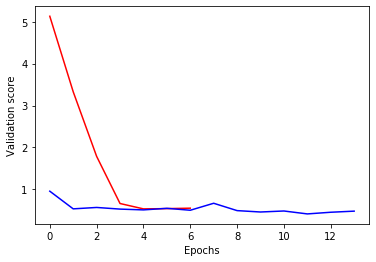

In [16]:
# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience=2)

# Create the new model: model_2
model_2 = Sequential()

# Add the first and second layers
model_2.add(Dense(100, activation='relu', input_shape=input_shape))
model_2.add(Dense(100, activation='relu'))

# Add the output layer
model_2.add(Dense(2, activation='softmax'))

# Compile model_2
model_2.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

# Fit model_1
model_1_training = model_1.fit(predictors,
                               target,
                               epochs=15,
                               validation_split=0.2,
                               callbacks=[early_stopping_monitor],
                               verbose=False)

# Fit model_2
model_2_training = model_2.fit(predictors,
                               target,
                               epochs=15,
                               validation_split=0.2,
                               callbacks=[early_stopping_monitor],
                               verbose=False)

# Create the plot
plt.plot(model_1_training.history['val_loss'], 'r',
         model_2_training.history['val_loss'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()

$\blacktriangleright$ **Code re-pre-loading:**

In [17]:
model_1 = Sequential()
model_1.add(Dense(50, activation='relu', input_shape=input_shape))
model_1.add(Dense(2, activation='softmax'))
model_1.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

$\blacktriangleright$ **Network layers adding practice:**

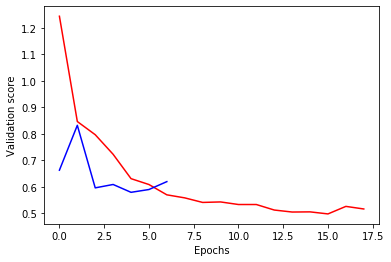

In [18]:
# The input shape to use in the first hidden layer
input_shape = (n_cols, )

# Create the new model: model_2
model_2 = Sequential()

# Add the first, second, and third hidden layers
model_2.add(Dense(50, activation='relu', input_shape=input_shape))
model_2.add(Dense(50, activation='relu'))
model_2.add(Dense(50, activation='relu'))

# Add the output layer
model_2.add(Dense(2, activation='softmax'))

# Compile model_2
model_2.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

# Fit model 1
model_1_training = model_1.fit(predictors,
                               target,
                               epochs=20,
                               validation_split=0.4,
                               callbacks=[early_stopping_monitor],
                               verbose=False)

# Fit model 2
model_2_training = model_2.fit(predictors,
                               target,
                               epochs=20,
                               validation_split=0.4,
                               callbacks=[early_stopping_monitor],
                               verbose=False)

# Create the plot
plt.plot(model_1_training.history['val_loss'], 'r',
         model_2_training.history['val_loss'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()

# Thinking about model capacity

**1. What is the connection between overfitting and model capacity?**

![Overfitting](ref5.%20Overfitting.jpg)

**2. What is a good workflow for optimizing model capacity?**

* Start with a small network.

* Gradually increase capacity.

* Keep increasing capacity until the validation score is no longer improving.

**3. How do sequential experiments function?**

![Sequential experiments](ref6.%20Sequential%20experiments.jpg)

**4. Practice question for experimenting with model structures:**

* Run an experiment to compare two identical networks except that the 2nd network had an extra hidden layer. It could be seen that this 2nd network (the deeper network) had better performance. Given that, which of the following would be a good experiment to run next for even better performance?

    $\Box$ Try a new network with fewer layers than anything you have tried yet.
    
    $\boxtimes$ Use more units in each hidden layer.
    
    $\Box$ Use fewer units in each hidden layer.

# Stepping up to images

**1. How to recognize handwritten digits?**

* The MNIST dataset.

* $28$ x $28$ grid flattened to $784$ values for each image.

* Value in each part of the array denotes the darkness of that pixel.

![Recognizing handwritten digits](ref7.%20Recognizing%20handwritten%20digits.jpg)

**5. Practice exercises for model validation:**

$\blacktriangleright$ **Package pre-loading:**

In [19]:
import pandas as pd
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical

$\blacktriangleright$ **Data pre-loading:**

In [20]:
df = pd.read_csv('ref8. MNIST.csv', header=None)
X = df.iloc[:, 1:].to_numpy()
y = to_categorical(df.iloc[:, 0])

$\blacktriangleright$ **Evaluating model accuracy on validation dataset practice:**

In [21]:
# Create the model: model
model = Sequential()

# Add the first hidden layer
model.add(Dense(50, activation='relu', input_shape=(784, )))

# Add the second hidden layer
model.add(Dense(50, activation='relu'))

# Add the output layer
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Fit the model
model.fit(X, y, validation_split=0.3)

44/44 [==============================] - 2s 46ms/step - loss: 30.6659 - accuracy: 0.3322 - val_loss: 5.7913 - val_accuracy: 0.5824


# Final thoughts

**1. What are the next steps?**

* Start with standard prediction problems on tables of numbers.

* Images (with convolutional neural networks) are common next steps.

* keras.io for excellent documentation.

* The graphical processing unit (GPU) provides dramatic speedups in model training times.

* Need a CUDA compatible GPU.

* Here is a [blog post](https://www.datacamp.com/community/tutorials/deep-learning-jupyter-aws) that explains how to training on using GPUs in the cloud.